### Whiskas Problem

#### Solving with CBC

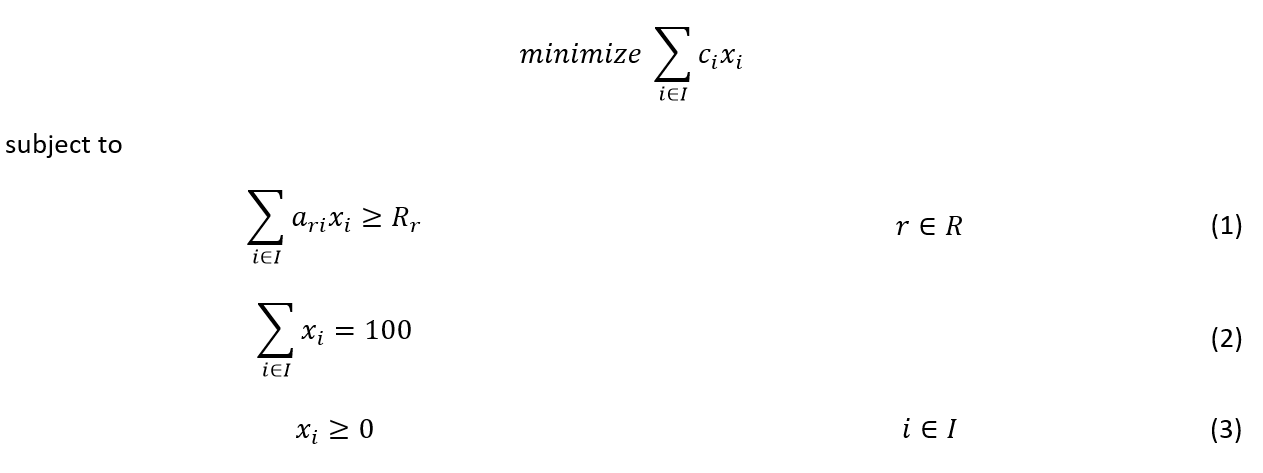

In [1]:
from IPython.display import Image
Image(filename='Model.png') 

### 1. Import PuLP modeller functions

In [20]:
from pulp import*

### 2. Define required parameters

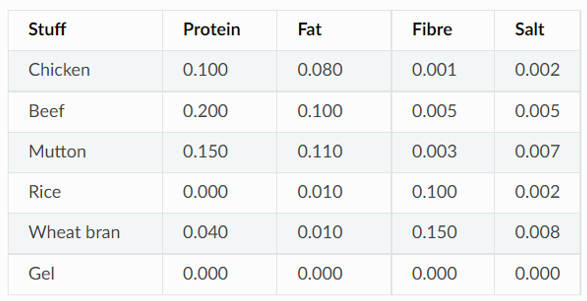

In [21]:
Image(filename='Parameters.png') 

In [4]:
Stuff = ["Chicken", "Beef", "Mutton", "Rice", "WheatBran", "Gel"]

Type = ["Protein", "Fat", "Fibre", "Salt"]


In [ ]:

Requirement = {"Protein": 8,
               "Fat": 6,
               "Fibre":2,
               "Salt": 0.4}

Ingredient  = {"Chicken":{"Protein": 0.1,
                           "Fat": 0.08,
                           "Fibre": 0.001,
                           "Salt": 0.002},
                "Beef":{"Protein": 0.2,
                           "Fat": 0.1,
                           "Fibre": 0.005,
                           "Salt": 0.005},
                "Mutton":{ "Protein": 0.15,
                           "Fat": 0.11,
                           "Fibre": 0.003,
                           "Salt": 0.007},
                "Rice":{"Protein": 0.0,
                           "Fat": 0.01,
                           "Fibre": 0.1,
                           "Salt": 0.002},
                "WheatBran":{"Protein": 0.04,
                           "Fat": 0.01,
                           "Fibre": 0.150,
                           "Salt": 0.008},
                "Gel":{"Protein": 0,
                           "Fat": 0,
                           "Fibre": 0,
                           "Salt": 0}}
Cost = {"Chicken": 0.013,
        "Beef": 0.008,
        "Mutton": 0.01,
        "Rice": 0.002,
        "WheatBran": 0.005,
        "Gel": 0.001}

### 3. Creates the prob variable to contain the problem data

In [22]:
model = LpProblem("Whiskas_Cat_Food", LpMinimize)

### 4. Define decision variable

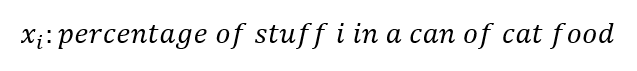

In [6]:
Image(filename='DecisionVariable.png')

In [23]:
X = LpVariable.dicts("x",
                      (Stuff),
                      lowBound = 0,
                      upBound = None,
                      cat = const.LpContinuous)

### 5. Define objective function

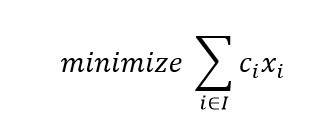

In [8]:
Image(filename='Objective.png')

In [24]:
model += lpSum(Cost[i]*X[i] for i in Stuff)

### 6. Define constraints

#### Constraint 1

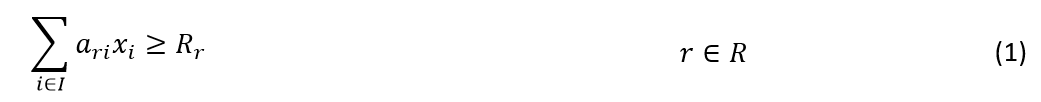

In [10]:
Image(filename='Constraint1.png')

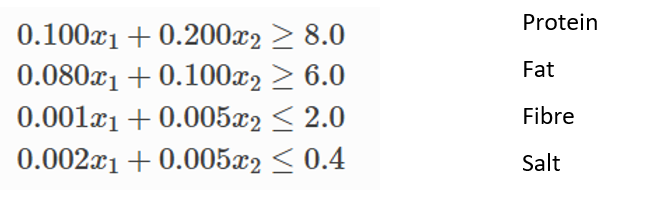

In [11]:
Image(filename='Constraint1Open.png')

In [25]:
for t in Type:
    if t != "Fibre" and t != "Salt":
        model += lpSum(Ingredient[i][t]*X[i] for i in Stuff) >= Requirement[t]
    else:
        model += lpSum(Ingredient[i][t]*X[i] for i in Stuff) <= Requirement[t]

#### Constraint 2

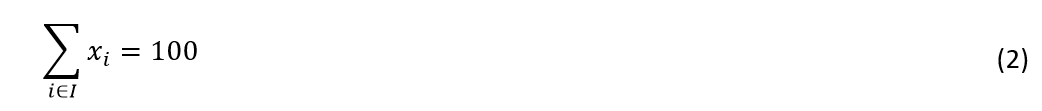

In [13]:
Image(filename='Constraint2.png')

In [26]:
model += lpSum(X[i] for i in Stuff) == 100

### 7. Solve problem

In [27]:
model.solve()

1

### 8. Print problem status

In [28]:
print("The problem status is", LpStatus[model.status])

The problem status is Optimal


### 9. Print decision variables which take value in the solution

In [29]:
for v in model.variables():
    if v.varValue >0.1:
        print(v.name, "=", v.varValue)

x_Beef = 60.0
x_Gel = 40.0


### 10. Print objective function

In [18]:
print("Total cost of the producing a cat food is", value(model.objective))

Total cost of the producing a cat food is 0.52


In [30]:
print(model)

Whiskas_Cat_Food:
MINIMIZE
0.008*x_Beef + 0.013*x_Chicken + 0.001*x_Gel + 0.01*x_Mutton + 0.002*x_Rice + 0.005*x_WheatBran + 0.0
SUBJECT TO
_C1: 0.2 x_Beef + 0.1 x_Chicken + 0.15 x_Mutton + 0.04 x_WheatBran >= 8

_C2: 0.1 x_Beef + 0.08 x_Chicken + 0.11 x_Mutton + 0.01 x_Rice
 + 0.01 x_WheatBran >= 6

_C3: 0.005 x_Beef + 0.001 x_Chicken + 0.003 x_Mutton + 0.1 x_Rice
 + 0.15 x_WheatBran <= 2

_C4: 0.005 x_Beef + 0.002 x_Chicken + 0.007 x_Mutton + 0.002 x_Rice
 + 0.008 x_WheatBran <= 0.4

_C5: x_Beef + x_Chicken + x_Gel + x_Mutton + x_Rice + x_WheatBran = 100

VARIABLES
x_Beef Continuous
x_Chicken Continuous
x_Gel Continuous
x_Mutton Continuous
x_Rice Continuous
x_WheatBran Continuous

